In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

# 한글 폰트 설정
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [206]:
# 데이타 로딩 - 기존 데이타셋과 다르기에 확인 필요
raw_data = pd.read_csv('./data/titanic.csv')
raw_data.info()

raw_data.describe()
raw_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##  생존자와 사망자의 시각화

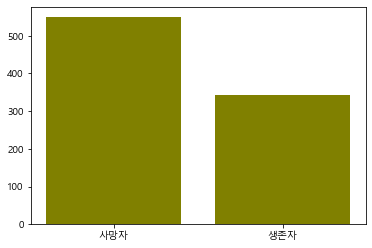

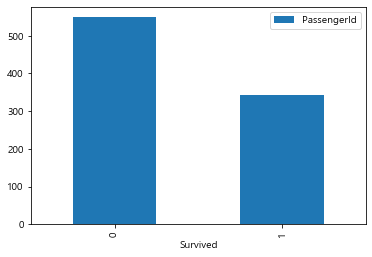

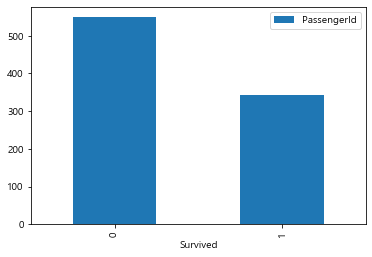

In [65]:
data=raw_data[['PassengerId', 'Survived']].groupby('Survived').count()
b = plt.bar(['사망자','생존자'], data['PassengerId'], color='olive')
data.plot(kind='bar')

data2=data.reset_index()
data2.plot.bar(x='Survived',y='PassengerId')

# 연령분포 시각화

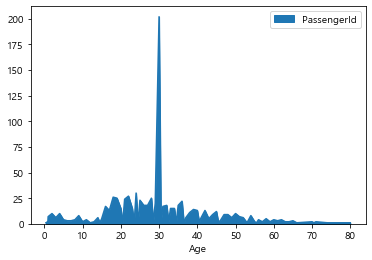

In [113]:
data=raw_data[['PassengerId', 'Age']].groupby('Age').count()
data.plot(kind='area')



# 객실등급별로 각 평균 통계 - 표

In [86]:
raw_data.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,37.089907,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.884946,0.402174,0.380435,20.662183
3,439.154786,0.242363,26.486599,0.615071,0.393075,13.675550


# 성별, 연령대, 객실등급별 생존자 시각화

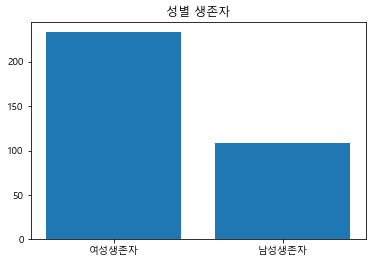

In [185]:
data = raw_data[raw_data['Survived']==1]
#sex_data = data.groupby('Sex').count()['PassengerId']
sex_data = data[['PassengerId', 'Sex']].groupby('Sex').count()
plt.bar(['여성생존자', '남성생존자'], sex_data['PassengerId'])
plt.title('성별 생존자 수')

Text(0.5, 1.0, '연령대별 생존자')

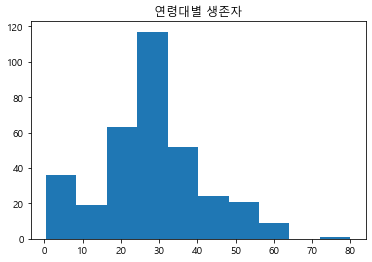

In [184]:
plt.hist(data['Age'])
plt.title('연령대별 생존자 수')

Text(0.5, 1.0, '등급별 생존자 수')

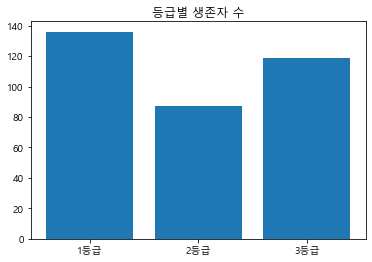

In [202]:
pclass_data = data.groupby('Pclass').count()['PassengerId']
plt.bar(['1등급','2등급','3등급'], pclass_data)
plt.title('등급별 생존자 수')


Text(0.5, 1.0, '등급별 생존자 비율')

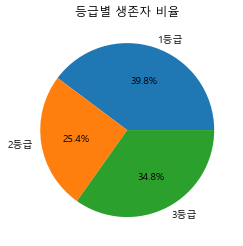

In [205]:
plt.pie(pclass_data, labels=['1등급','2등급','3등급'], autopct='%0.1f%%')
plt.title('등급별 생존자 비율')

# 상관관계 분석하여 해석하기

- seaborn 패키지 heatmap()

- matplotlib 패키지 scatter()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

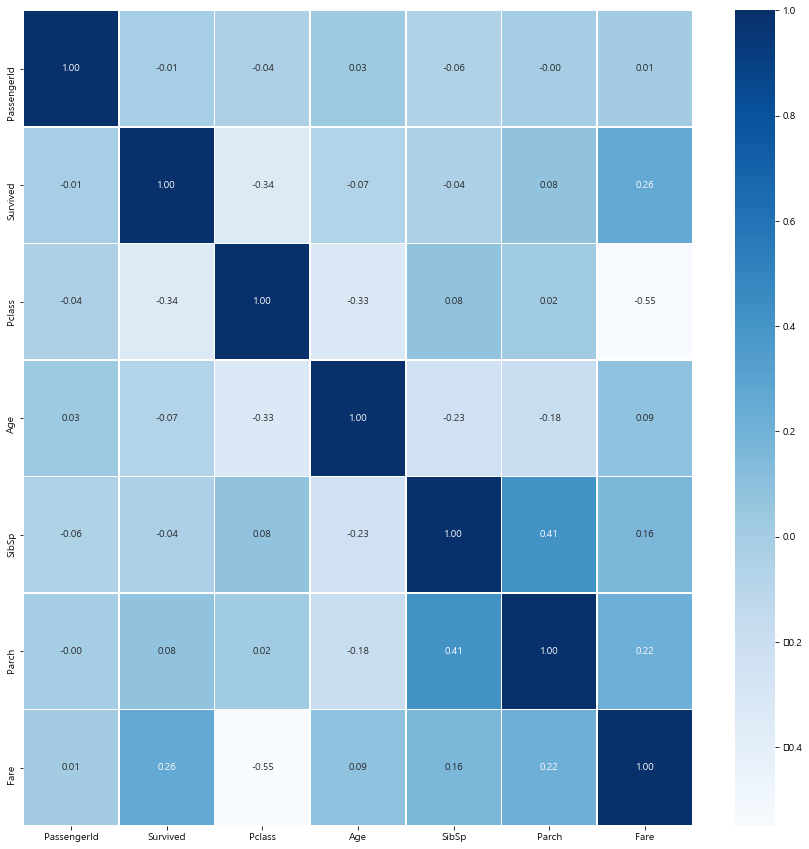

In [230]:
%matplotlib inline

plt.figure(figsize=(15,15))
sns.heatmap(data=raw_data.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.scatter(data=raw_data)

In [232]:
plt.figure(figsize=(15,15))
plt.scatter(data=raw_data.corr())

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

<Figure size 1080x1080 with 0 Axes>